# Visualising Seattle Bicycle Counts Hourly Data Set
## Chapter 3: Data Manipulation with Pandas
### Python Data Science / Page 202

**Note:** Excelent way of doing data mining in Jupyter. In this notebook I demonstraded how to mine data for patterns and how to visualise those patterns using Jupyter and Pandas.

**Links:**
1. __[Is Seattle Really Seeing an Uptick In Cycling?](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/)__
1. __[A statistical analysis of biking on the Fremont Bridge, Part 1: Overview](https://www.seattlebikeblog.com/2014/06/09/a-statistical-analysis-of-biking-on-the-fremont-bridge-part-1-overview/)__
1. __[A statistical analysis of biking on the Fremont Bridge, Part 2: Rain](https://www.seattlebikeblog.com/2014/06/10/a-statistical-analysis-of-biking-on-the-fremont-bridge-part-2-rain/)__
1. __[A statistical analysis of biking on the Fremont Bridge, Part 3: Bike Month](https://www.seattlebikeblog.com/2014/06/11/a-statistical-analysis-of-biking-on-the-fremont-bridge-part-3-bike-month/)__
1. __[A statistical analysis of biking on the Fremont Bridge, Part 4: Are more people biking?](https://www.seattlebikeblog.com/2014/06/12/a-statistical-analysis-of-biking-on-the-fremont-bridge-part-4-are-more-people-biking/)__
1. __[City Showdown: How do Cambridge Cyclers Compare to Seattle Cyclers?](http://nbviewer.jupyter.org/gist/lindabli/ee7aed9d875a698526fd)__

**TODO:**
1. Add support for other variables like weather and temperature. See first link.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn; seaborn.set()
import numpy as np

%matplotlib inline

## Visualise the data:

In [2]:
data_set_home = %env DATA_SETS_HOME
date_format_daily = "%m/%d/%Y"
date_format_hourly = "%m/%d/%Y %I:%M:%S %p"
dateparse = lambda x: pd.datetime.strptime(x, date_format_hourly)

data = pd.read_csv(
    "{0}/Fremont_Bridge_Hourly_Bicycle_Counts.csv".format(data_set_home),
    index_col=[0],
    parse_dates=True,
    date_parser=dateparse
)
data.sort_index(inplace=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


## Change the name of columns and add total column:

In [3]:
data.columns = ["West", "East"]
data["Total"] = data.eval("West + East")
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


## Describe the data:

In [4]:
data.dropna().describe()

,West,East,Total
count,51063.000000,51063.000000,51063.000000
mean,57.126902,53.654329,110.781231
std,82.685731,70.067851,139.511157
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,29.000000,60.000000
75%,70.000000,71.000000,145.000000
max,717.000000,698.000000,957.000000


## Plot the total data:

Text(0,0.5,'Hourly Bicycle Count')

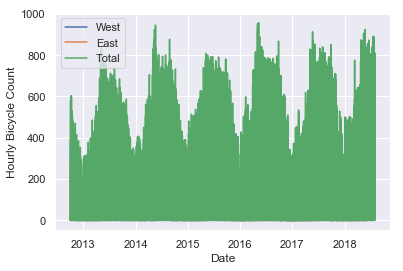

In [5]:
data.plot()
plt.ylabel("Hourly Bicycle Count")

## Plot a subset of the data:

Text(0,0.5,'Hourly Bicycle Count')

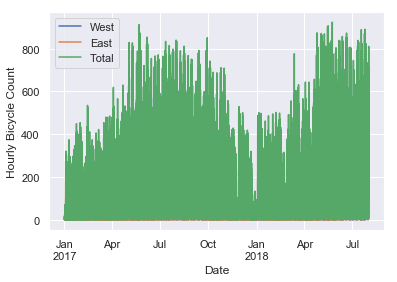

In [6]:
data["2017":"2018"].plot()
plt.ylabel("Hourly Bicycle Count")

## Resample by day:

Text(0,0.5,'Daily Bicycle Count')

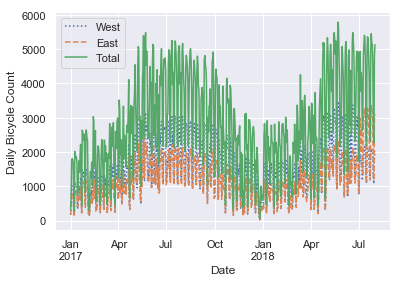

In [18]:
daily = data["2017":"2018"].resample("D").sum()
daily.plot(style=[":", "--", "-"])
plt.ylabel("Daily Bicycle Count")

## Resample and group the data by month:

The following will resample the data set summing all days into months, like:

```
2012/01/31 | 2000 # Uses the last day of the month as day.
2012/02/28 | 2400 # Uses the last day of the month as day.
...
```

After which the resulting data can be grouped by month over all years in the data set and averaged.

**Observation:** What we can see here is a pattern, where summer months are when cyclists are crossing more times the bridge. Likely because the weather is much better for a bike ride.

Text(0,0.5,'Monthly Bicycle Mean')

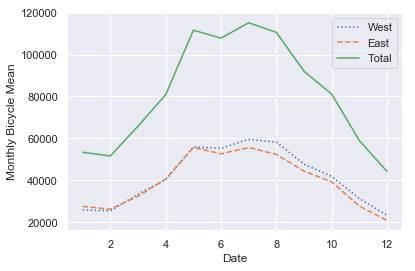

In [7]:
segment = data["2013":"2017"].resample("M").sum()
monthly = segment.groupby(segment.index.month).mean()
monthly.plot(style=[":", "--", "-"])
plt.ylabel("Monthly Bicycle Mean")

## Resample by day and compute a 30-day window rolling mean:

Text(0,0.5,'Mean Daily Count')

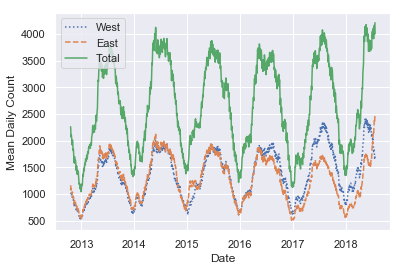

In [9]:
daily = data.resample("D").sum()
daily.rolling(30, center=True).mean().plot(style=[":", "--", "-"])
plt.ylabel("Mean Daily Count")

## Compute a Gaussian rolling window:

Text(0,0.5,'Mean Daily Count')

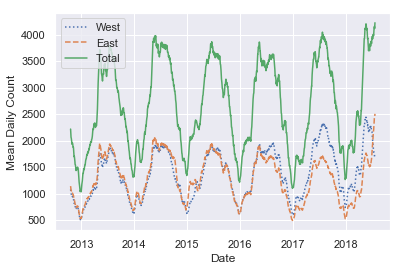

In [15]:
daily.rolling(30, center=True, win_type="gaussian").mean(std=10).plot(style=[":", "--", "-"])
plt.ylabel("Mean Daily Count")

## Resample and group the data by hour:

In this case there is no need to resample the data set, because each entry is already separated by hour of the day.

The result of the grouping will be averaged and plotted.

In [11]:
by_time = data.groupby(data.index.time).mean()
by_time.head()

,West,East,Total
00:00:00,6.790883,5.266917,12.057801
01:00:00,3.407895,2.927632,6.335526
02:00:00,2.137541,2.100801,4.238342
03:00:00,1.396617,1.614192,3.010808
04:00:00,2.861372,3.558741,6.420113


### Plot the data set grouped by hour:

Each tick will mark a 3 hour time frame.

**Observation:** Also we can see here that bike activity is higher from **06:00-09:00** and **15:00-18:00**. Which probably means commuting using the bike.

Text(0,0.5,'Hourly Bicycle Mean')

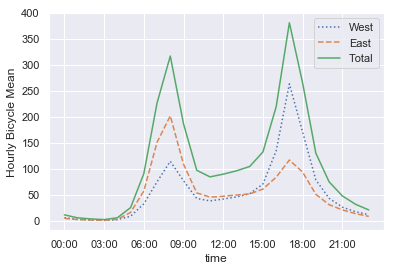

In [12]:
hourly_ticks = (3 * 60 * 60) * np.arange(8)
by_time.plot(xticks=hourly_ticks, style=[":", "--", "-"])
plt.ylabel("Hourly Bicycle Mean")

## Resample and group the data by week day:

The following will resample the data set summing all hours into days, like:

```
2012/01/01 | 200
2012/01/02 | 240
...
```

After which the resulting data can be grouped by week day over all months and years in the data set and averaged.

**Observation:** What we can see here is the same pattern as before with commuting activity. During business days the activity is higher, leading to a drop at weekends.

Text(0,0.5,'Week Day Bicycle Mean')

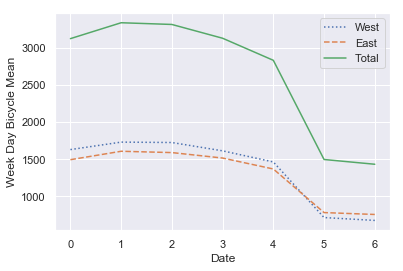

In [13]:
segment = data["2013":"2017"].resample("D").sum()
weekday = segment.groupby(segment.index.dayofweek).mean()
weekday.plot(style=[":", "--", "-"])
plt.ylabel("Week Day Bicycle Mean")

## Look for hourly patterns by doing a compound grouping Weekday vs Weekend:

**Observation:** An interesting pattern emerges here, where as we have seen before, during week days the higher counts corresponds to start and end of business days, which implies commuting using bikes, but in this case, we can also seen that during weekends the higher counts are seen after lunch, in the afternoon, between **12:00-18:00**, which implies biking as a leisure. **Bimodal** pattern during week days and **unimodal** pattern during week ends.

Text(0,0.5,'Hourly Bicycle Mean')

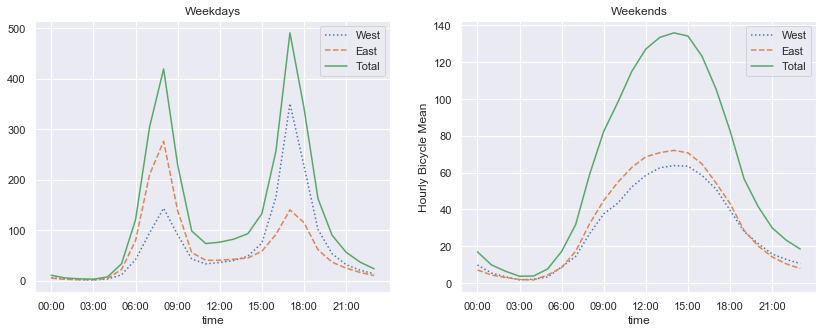

In [28]:
segment = data["2013":"2017"]
# first create a numpy array out of the days in the index. i.e. iterate each
# entry in the index and if it's less than 5 then it means it's a week day else
# it's a weekend day.
# the resulting array will contain only two values: Weekday or Weekend
weekend = np.where(segment.index.weekday < 5, "Weekday", "Weekend") # returns ndarray
compound = segment.groupby([weekend, segment.index.time]).mean() # segment.index.time is ndarray as well
# plot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
compound.loc["Weekday"].plot(
    ax=ax[0], 
    title="Weekdays", 
    xticks=hourly_ticks, style=[":", "--", "-"]
)
compound.loc["Weekend"].plot(
    ax=ax[1], 
    title="Weekends", 
    xticks=hourly_ticks, style=[":", "--", "-"]
)
plt.ylabel("Hourly Bicycle Mean")

# debug
# print(segment.index.time.shape)
# print(weekend.shape)
# compound.head(40)